# Phishing Analysis for Moveworks.

**What is Phishing?**

*According to Phishing.org:*

*Phishing is a cybercrime in which a target or targets are contacted by email, telephone or text message by someone posing as a legitimate institution to lure individuals into providing sensitive data such as personally identifiable information, banking and credit card details, and passwords.*



##Question 1:

# This dataset is a collection companies attacked by phishing url's.
* There are 12.8k rows
* Companies include big names like Facebook, Paypal, Google etc.
* Dates Range from 2012-2020.
* The target column includes an entry called 'other' that accounts for more than 10K+ phishing attacks. Since 'other' is a bit vague in this context. For this analysis we are going to ignore that.

In [351]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets



In [352]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8

In [353]:
odf = pd.read_csv('D:/Moveworks/online.csv')

In [354]:
odf.loc[:, 'submission_time'] = pd.to_datetime(odf.loc[:, 'submission_time'])
odf.loc[:, 'verification_time'] = pd.to_datetime(odf.loc[:, 'verification_time'])


odf['delta'] = odf['verification_time'] - odf['submission_time']

In [355]:
odf['delta_int'] = odf['delta'].values.astype(np.int64)

## Question 2:


**Key Insights**
* Paypal has witnessed the highest number of attacks overall. Considering it's a payment gateway. This is very alarming.
* Microsoft is not prone to phishing either,It has witnessed more than 200 attacks overall.
* Facebook is on the third place when it comes to showing susceptibility towards phishing attacks.

In [356]:
top10=odf['target'].value_counts().head(11)
top10 = pd.DataFrame(top10)
top10 = top10.reset_index()
top10.columns = ['Companies', 'attacks']

In [357]:
# get a list of all the column names 
indexNamesArr = top10.Companies.values

In [358]:
top10=top10[top10.Companies.isin(['PayPal', 'Microsoft', 'Facebook', 'RuneScape',
       'eBay, Inc.', 'Three', 'Steam', 'Google', 'Allegro', 'Orange'])]

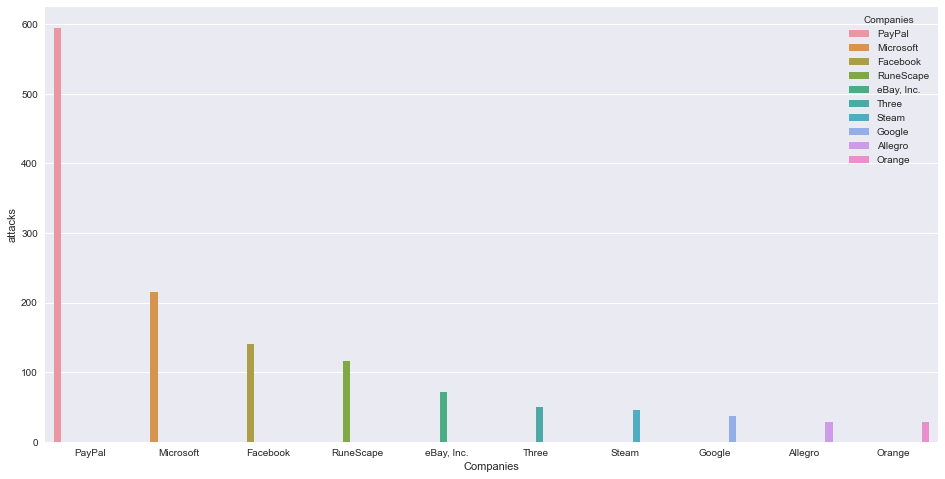

In [359]:
sns.barplot(x="Companies", hue="Companies", y="attacks", data=top10)

In [360]:
odf.groupby(['target']).size().sort_values()

odf['year'] = pd.DatetimeIndex(odf['submission_time']).year

## Question 3:

# How have the attacks on target brands have trended over years?

**Key Insights**
* The number of attacks on Paypal have increased significantly over the years. The payment gateway witnessed an **80%** spike between years 2018 and 2019.
* Microsoft has witnessed an uptick in the number of attacks as well. There has been a **30%** increase in the number of attacks between years 2018-19.
* Facebook witnessed an uptick in Phishing attacks in the year 2018 but they were able to curb it in 2019. Although, the attacks have shot up again in 2020.


In [361]:
gg=pd.DataFrame(odf.groupby(['year','target']).size().sort_values(ascending=False))
gg = gg.reset_index()
gg.columns = ['Year', 'Companies','Attacks']


In [362]:
gg=gg[gg.Companies.isin(['PayPal', 'Microsoft', 'Facebook', 'RuneScape',
       'eBay, Inc.', 'Three', 'Steam', 'Google', 'Allegro', 'Orange'])]


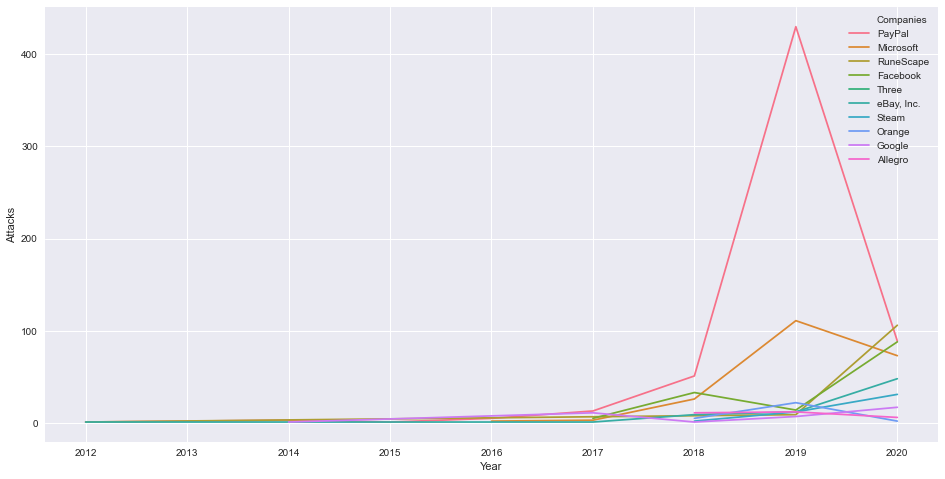

<Figure size 14400x25920 with 0 Axes>

<Figure size 14400x25920 with 0 Axes>

In [363]:
sns.lineplot(x="Year", y="Attacks", hue="Companies", data=gg)
plt.show()
plt.figure(figsize=(200, 360))


## Question 4 and 5

# Paypal has been the most targeted brand. 

 * There has been an upward trend in in the number of attacks on Paypal. 
 * Although, the number of attacks on Facebook have surpassed of those of Paypal in 2020.
 * This could be an alarming bell for Facebook.
 * Certainly more Data is necessary inorder to predict the uptick in number of attacks.

In [364]:
topBrand= gg[gg.Companies.isin(['PayPal'])]

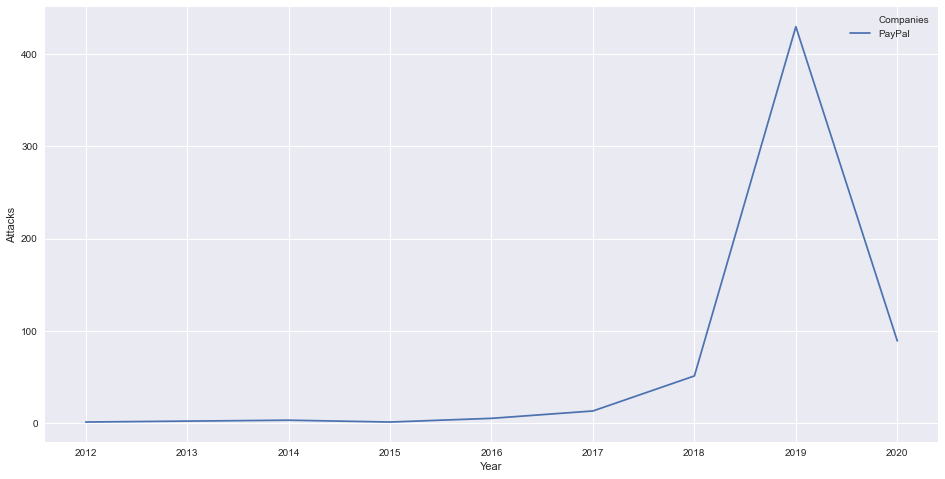

In [365]:
sns.lineplot(x="Year", y="Attacks", hue="Companies", data=topBrand)
plt.show()

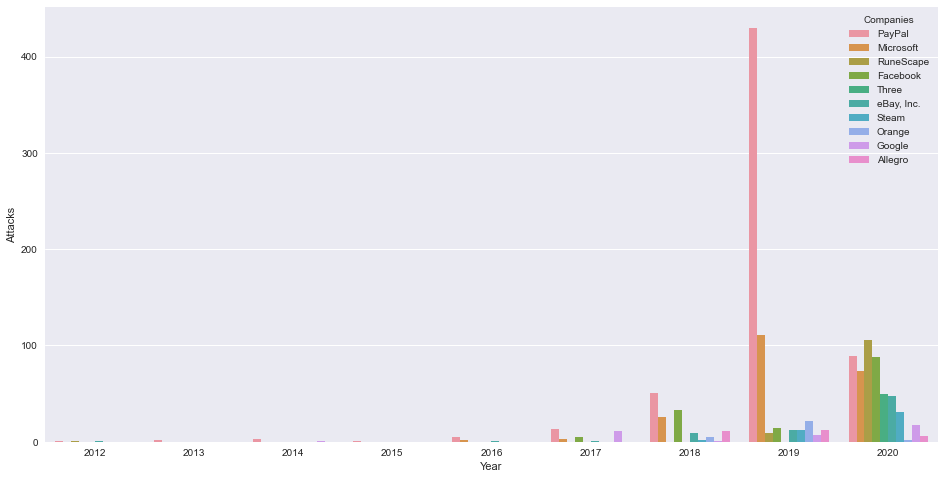

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [366]:
sns.barplot(x="Year", hue="Companies", y="Attacks", data=gg)
plt.show()
plt.figure(figsize=(8, 6))

## Question 8 and 9:

# How much time does it require for a company to verify a Phishing attack?

* Since there was a submission time and Verification time column in the dataset. I calculated the delta between these two columns.
* I carried out a statistical analysis on the delta column. Here are the findings:

    * It takes 8.9 days on an average for a company to figure whether there is a phishing attack.
    * 75% of companies take as much as 4 days to verify a phishing attack.
    * The time rquired to verify an attack varies by 52 days.

In [367]:
#Company wise time taken to verify phishing attack:
ct=odf[['target','delta']]

In [368]:
ct.days=pd.to_timedelta(ct.delta, errors='coerce').dt.days


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [369]:
ct.days.describe()

count    12568.000000
mean         8.941120
std         52.247598
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       2241.000000
Name: delta, dtype: float64

In [370]:
top10time= ct.groupby('target').mean(numeric_only=False).sort_values(by='delta',ascending=False).head(10)

In [371]:
top10time = top10time.reset_index()
top10time.columns = ['Companies', 'days']

In [372]:
top10time.days=pd.to_timedelta(top10time.days, errors='coerce').dt.days

**Key Insights**

* There are Banks and Companies that have taken as much as 113 days to verify a phishing attack.

* As a software provider I would try to pitch to these companies how my software can catch errors in a span of minutes and save on theft costs.

* Given the fact that this is a time series data, we can start with Time Series Forecast for the companies.

* The very fact that there is a lag between Submission Date and Verification date would turn into KPI's.If the company was to sell an anti-phishing product.

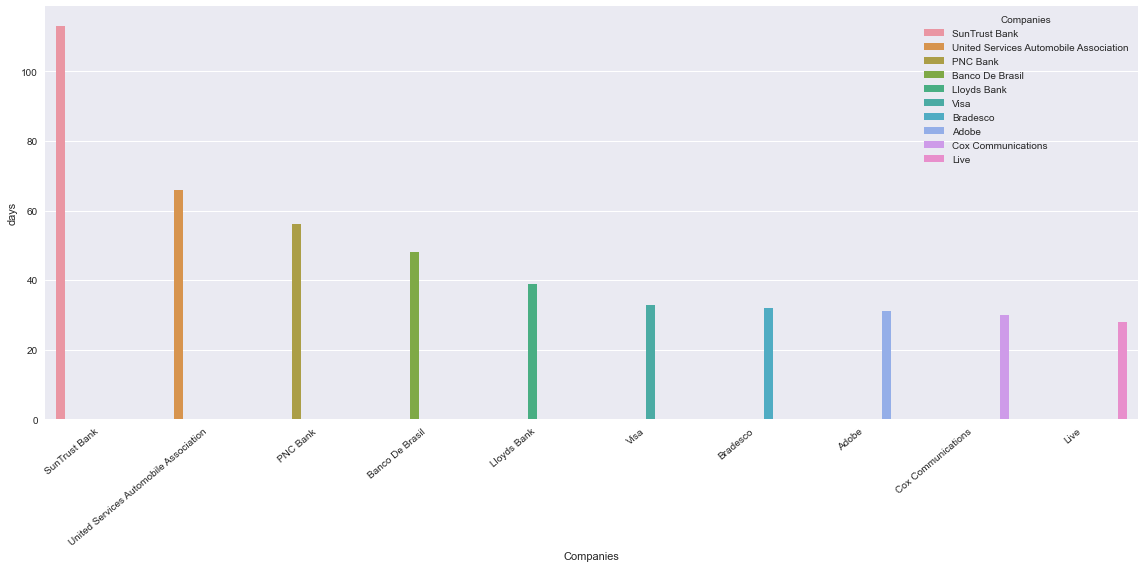

In [373]:
ax= sns.barplot(x="Companies", hue="Companies", y="days", data=top10time)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
